## D2f
the theoretical bound here $O(n^{1/2})$, but what we have observed in the earlier simulations is that
this quantity slightly grows but definitely not at the rate $n^{1/2}$.
In this set-up one may also consider

$$
\mathbb{E}\left[\bar{F}_{n}^{M}\left(X^{[n]}\right)-\bar{F}_{n}^{M}\left(X^{1,[n]}\right)\right] \tag{D2f$\Delta$}
$$

$$
\bar{F}_{n}^{M}\left(X^{[n]}\right):=h_{n}^{-1 / 2} f\left(\Delta_{2}(n, X)\right) . \tag{C.17}
$$

The limit is as before

$$
\mathbb{E}\left[f\left(I_{T}^{1}\right) I_{T}^{1}\right] . \tag{D2f$\Delta$inf}
$$

##  M1 Models


### D2fM1_check

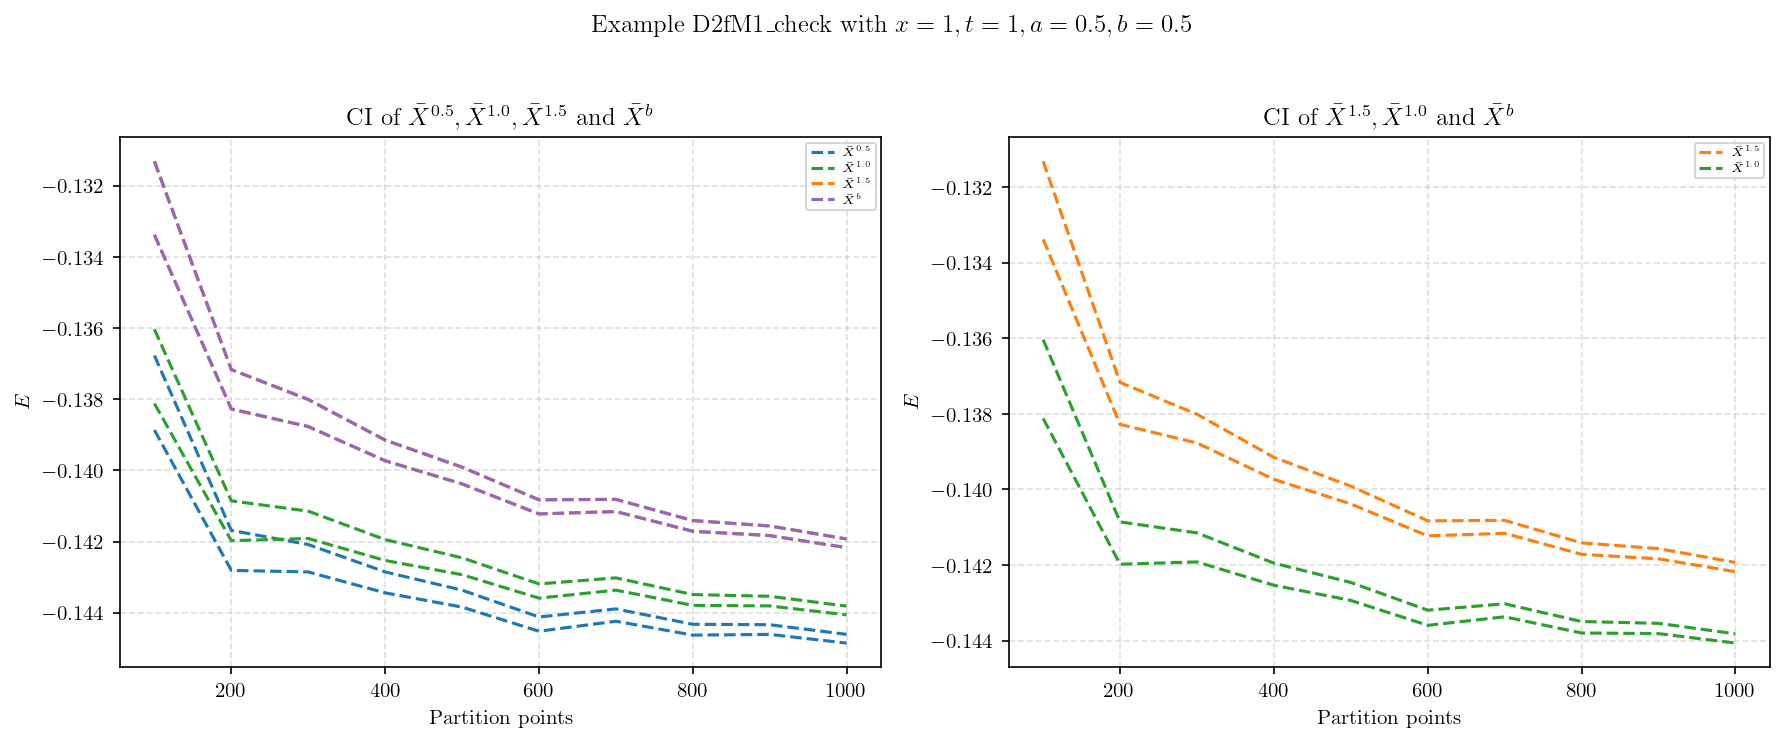

image saved to: sim_pics/D2fM1_check_100_1000_subplot.png


In [7]:
#D2fM1_check_100_1000
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")  # フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "D2fM1_check_100_1000_subplot.png"  # 画像保存パス（ファイル名だけ変更）

# 信頼水準(confidence level)の関数
def conf_level(a):  # aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a
    z = norm.ppf(1 - alpha / 2)
    return z

df2 = pd.read_csv("../data_source/D2fM1_check_100_1000_data.csv")

# z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a = 0.95
z = conf_level(a)

A_std_df2   = np.sqrt(df2['E'])      # Aの標本標準偏差(SD)
Am_std_df2  = np.sqrt(df2['Em'])     # Amの標本標準偏差(SD)
A15_std_df2 = np.sqrt(df2['E_1_5'])  # A_1_5の標本標準偏差(SD)
Axb_std_df2 = np.sqrt(df2['Eb'])     # A_bの標本標準偏差(SD)

paths = 10 * (df2['points'] ** 2)

# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)
Axb_se_df2   = Axb_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']      + z * A_se_df2
A_low_df2    = df2['A']      - z * A_se_df2
Am_up_df2    = df2['Am']     + z * Am_se_df2
Am_low_df2   = df2['Am']     - z * Am_se_df2
A15_up_df2   = df2['A_1_5']  + z * A15_se_df2
A15_low_df2  = df2['A_1_5']  - z * A15_se_df2
Axb_up_df2   = df2['Ab']     + z * Axb_se_df2
Axb_low_df2  = df2['Ab']     - z * Axb_se_df2

# ---------- ここから subplot で 2 枚の図を描画 ----------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

# ===== 左側の図：元の3種類の信頼区間 =====
ax1 = axes[0]
ax1.plot(df2["points"], A_up_df2,  linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax1.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4")
ax1.plot(df2["points"], Am_up_df2,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax1.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c")
ax1.plot(df2["points"], A15_up_df2,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax1.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e")
ax1.plot(df2["points"], Axb_up_df2,  linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$")
ax1.plot(df2["points"], Axb_low_df2, linestyle="--", color="#9467bd")

ax1.set_title(r'CI of $\bar{X}^{0.5}, \bar{X}^{1.0}, \bar{X}^{1.5}$ and $\bar{X}^{b}$')
ax1.set_xlabel("Partition points")
ax1.set_ylabel("$E$")
ax1.grid(True, linestyle="--", alpha=0.4)
ax1.legend(fontsize=5.5, loc='best')

# ===== 右側の図：指定された4本の線の図 =====
ax2 = axes[1]
ax2.plot(df2["points"], A15_up_df2,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax2.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e")
# ax2.plot(df2["points"], Axb_up_df2,  linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$")
# ax2.plot(df2["points"], Axb_low_df2, linestyle="--", color="#9467bd")
ax2.plot(df2["points"], Am_up_df2,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax2.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c")

ax2.set_title(r'CI of $\bar{X}^{1.5},\bar{X}^{1.0}$ and $\bar{X}^{b}$')
ax2.set_xlabel("Partition points")
ax2.set_ylabel("$E$")
ax2.grid(True, linestyle="--", alpha=0.4)
ax2.legend(fontsize=5.5, loc='best')

# 全体タイトル（必要なら）
fig.suptitle(r'Example D2fM1_check with $x=1,t=1,a=0.5,b=0.5$')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 上に suptitle を置くために rect を少し縮める
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

### D2fM1_check_log

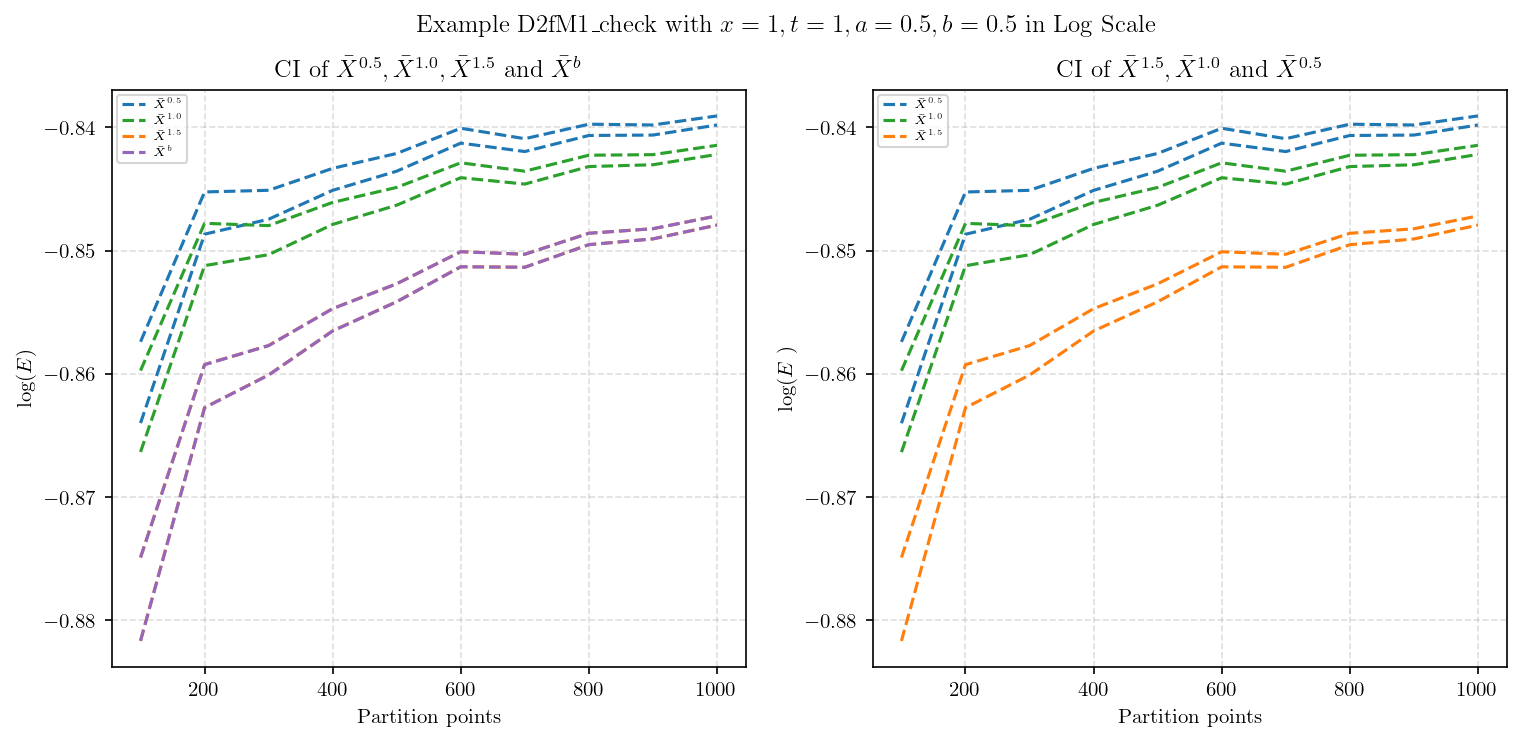

image saved to: sim_pics/D2fM1_check_log_100_1000.png


In [8]:
#D2fM1_check plot in Log scale
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")  # フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "D2fM1_check_log_100_1000.png"  # 画像保存パス（ファイル名だけ変更）

# 信頼水準(confidence level)の関数
def conf_level(a):  # aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a
    z = norm.ppf(1 - alpha / 2)
    return z

df2 = pd.read_csv("../data_source/D2fM1_check_100_1000_data.csv")

# z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a = 0.95
z = conf_level(a)

A_std_df2   = np.sqrt(df2['E'])      # Aの標本標準偏差(SD)
Am_std_df2  = np.sqrt(df2['Em'])     # Amの標本標準偏差(SD)
A15_std_df2 = np.sqrt(df2['E_1_5'])  # A_1_5の標本標準偏差(SD)
std_lim = np.sqrt(df2['Eb'])     # A_bの標本標準偏差(SD)


paths = 10 * (df2['points'] ** 2)

# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)
se_lim   = std_lim / np.sqrt(paths)


# Confidence bands
A_up_df2     = df2['A']      + z * A_se_df2
A_low_df2    = df2['A']      - z * A_se_df2
Am_up_df2    = df2['Am']     + z * Am_se_df2
Am_low_df2   = df2['Am']     - z * Am_se_df2
A15_up_df2   = df2['A_1_5']  + z * A15_se_df2
A15_low_df2  = df2['A_1_5']  - z * A15_se_df2
lim_up_df3   = df2['Ab']     + z * se_lim
lim_low_df3  = df2['Ab']     - z * se_lim


#Confidence bands in Log scale
A_up_df2_log     = np.log10(abs(A_up_df2))
A_low_df2_log    = np.log10(abs(A_low_df2))
Am_up_df2_log    = np.log10(abs(Am_up_df2))
Am_low_df2_log   = np.log10(abs(Am_low_df2))
A15_up_df2_log   = np.log10(abs(A15_up_df2))
A15_low_df2_log  = np.log10(abs(A15_low_df2))
lim_up_df3_log   = np.log10(abs(lim_up_df3))
lim_low_df3_log  = np.log10(abs(lim_low_df3))
    


# ---------- ここから subplot で 2 枚の図を描画 ----------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

# ===== 左側の図：元の3種類の信頼区間 =====
ax1 = axes[0]
ax1.plot(df2["points"], A_up_df2_log,  linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax1.plot(df2["points"], A_low_df2_log, linestyle="--", color="#1f77b4")
ax1.plot(df2["points"], Am_up_df2_log,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax1.plot(df2["points"], Am_low_df2_log, linestyle="--", color="#2ca02c")
ax1.plot(df2["points"], A15_up_df2_log,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax1.plot(df2["points"], A15_low_df2_log, linestyle="--", color="#ff7f0e")
ax1.plot(df2["points"], lim_up_df3_log,  linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$")
ax1.plot(df2["points"], lim_low_df3_log, linestyle="--", color="#9467bd")

ax1.set_title(r'CI of $\bar{X}^{0.5}, \bar{X}^{1.0}, \bar{X}^{1.5}$ and $\bar{X}^{b}$')
ax1.set_xlabel("Partition points")
ax1.set_ylabel(r"log($E$) ")
ax1.grid(True, linestyle="--", alpha=0.4)
ax1.legend(fontsize=5.5, loc='best')

# ===== 右側の図：指定された4本の線の図 =====
ax2 = axes[1]
ax2.plot(df2["points"], A_up_df2_log,  linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax2.plot(df2["points"], A_low_df2_log, linestyle="--", color="#1f77b4")
ax2.plot(df2["points"], Am_up_df2_log,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax2.plot(df2["points"], Am_low_df2_log, linestyle="--", color="#2ca02c")
ax2.plot(df2["points"], A15_up_df2_log,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax2.plot(df2["points"], A15_low_df2_log, linestyle="--", color="#ff7f0e")


ax2.set_title(r'CI of $\bar{X}^{1.5},\bar{X}^{1.0}$ and $\bar{X}^{0.5}$')
ax2.set_xlabel("Partition points")
ax2.set_ylabel(r"log($E$ )")
ax2.grid(True, linestyle="--", alpha=0.4)
ax2.legend(fontsize=5.5, loc='best')

# 全体タイトル（必要なら）
fig.suptitle(r'Example D2fM1_check with $x=1,t=1,a=0.5,b=0.5$ in Log Scale')
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

### D2fM1

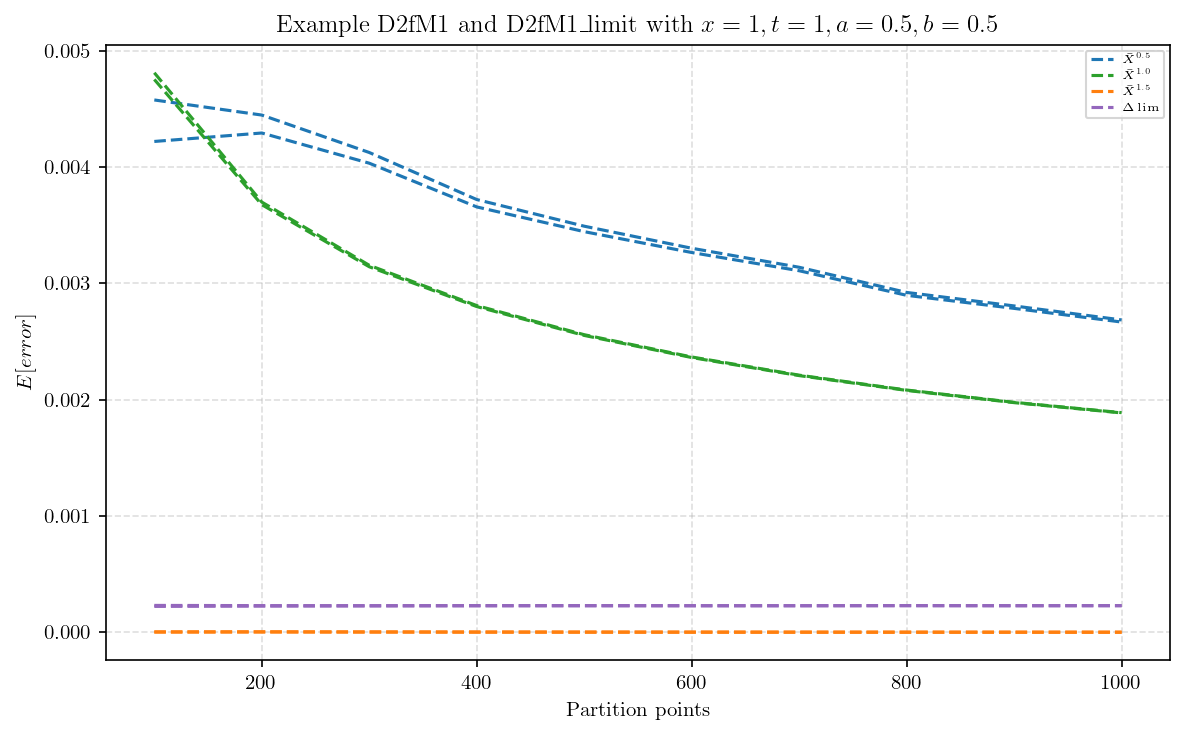

image saved to: sim_pics/D2fM1_and_limit_100_1000.png


In [5]:
#D2fM1_100_1000 plot with confidence intervals
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")# フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "D2fM1_and_limit_100_1000.png" #画像保存パス

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percaent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("../data_source/D2fM1_100_1000_data.csv")
df3 = pd.read_csv("../data_source/D2fM1_100_1000_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1_5']) #A_1_5の標本標準偏差(SD)
Axb_std_df3 = np.sqrt(df3['Eb']) #A_bの標本標準偏差(SD)

paths = 10 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)
Axb_se_df3   = Axb_std_df3 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1_5'] + z * A15_se_df2
A15_low_df2  = df2['A_1_5'] - z * A15_se_df2
Axb_up_df3   = df3['Ab'] + z * Axb_se_df3
Axb_low_df3  = df3['Ab'] - z * Axb_se_df3


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4")  
plt.plot(df2["points"], Am_up_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
plt.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c")  
plt.plot(df2["points"], A15_up_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e")
plt.plot(df3["points"], Axb_up_df3, linestyle="--", color="#9467bd", label=r"$\Delta\lim$ ")
plt.plot(df3["points"], Axb_low_df3, linestyle="--", color="#9467bd")


plt.title(r'Example D2fM1 and D2fM1_limit with $x=1,t=1,a=0.5,b=0.5$')
plt.xlabel("Partition points")
plt.ylabel("$E[error]$ ")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

### D2fM1_log

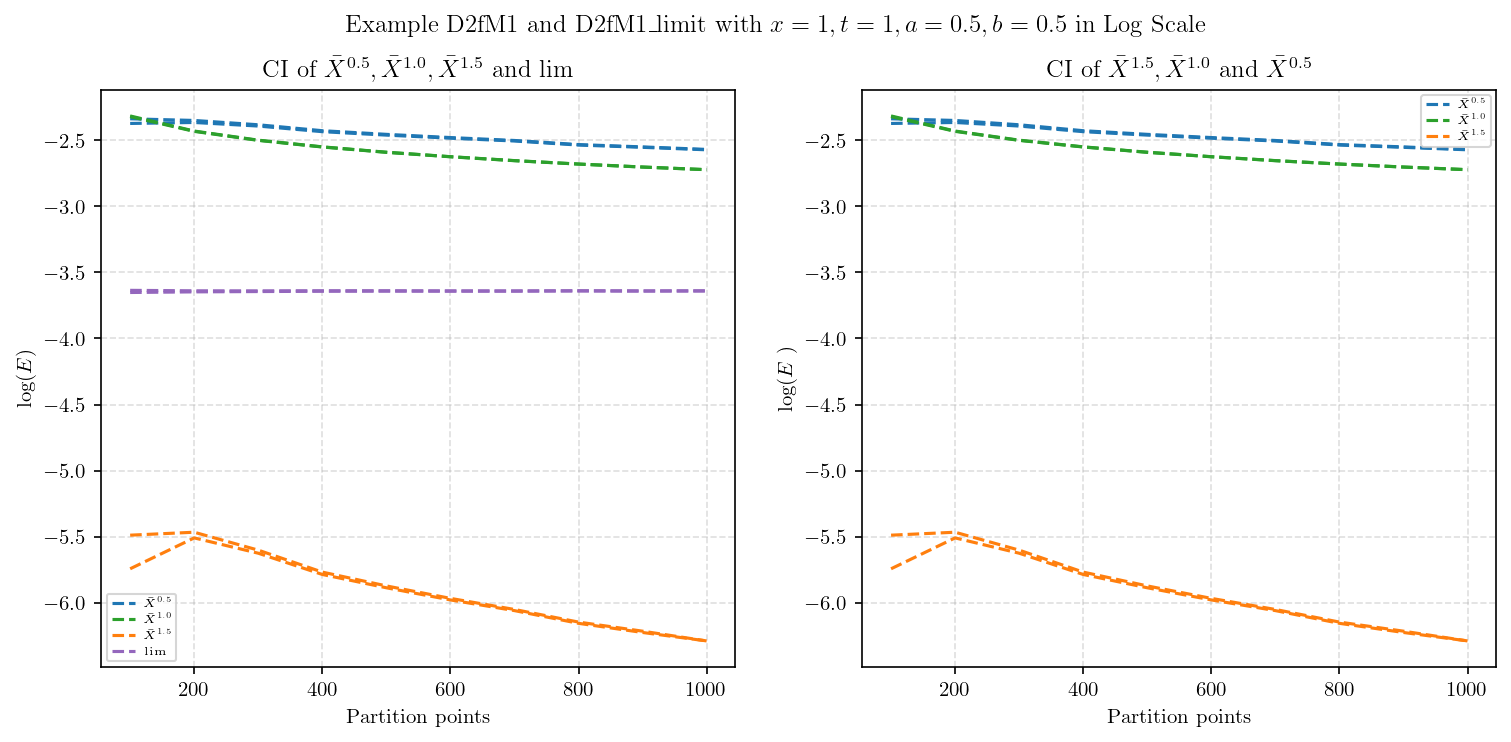

image saved to: sim_pics/D2fM1_and_lim_100_1000_subplot.png


In [6]:
#D2fM1_and_D2fM1_limit_100_1000 plot in Log scale
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")  # フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "D2fM1_and_lim_100_1000_subplot.png"  # 画像保存パス（ファイル名だけ変更）

# 信頼水準(confidence level)の関数
def conf_level(a):  # aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a
    z = norm.ppf(1 - alpha / 2)
    return z

df2 = pd.read_csv("../data_source/D2fM1_100_1000_data.csv")
df3 = pd.read_csv("../data_source/D2fM1_100_1000_data.csv")

# z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a = 0.95
z = conf_level(a)

A_std_df2   = np.sqrt(df2['E'])      # Aの標本標準偏差(SD)
Am_std_df2  = np.sqrt(df2['Em'])     # Amの標本標準偏差(SD)
A15_std_df2 = np.sqrt(df2['E_1_5'])  # A_1_5の標本標準偏差(SD)
std_lim = np.sqrt(df3['Eb'])     # A_bの標本標準偏差(SD)


paths = 10 * (df2['points'] ** 2)

# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)
se_lim   = std_lim / np.sqrt(paths)


# Confidence bands
A_up_df2     = df2['A']      + z * A_se_df2
A_low_df2    = df2['A']      - z * A_se_df2
Am_up_df2    = df2['Am']     + z * Am_se_df2
Am_low_df2   = df2['Am']     - z * Am_se_df2
A15_up_df2   = df2['A_1_5']  + z * A15_se_df2
A15_low_df2  = df2['A_1_5']  - z * A15_se_df2
lim_up_df3   = df3['Ab']     + z * se_lim
lim_low_df3  = df3['Ab']     - z * se_lim


#Confidence bands in Log scale
A_up_df2_log     = np.log10(abs(A_up_df2))
A_low_df2_log    = np.log10(abs(A_low_df2))
Am_up_df2_log    = np.log10(abs(Am_up_df2))
Am_low_df2_log   = np.log10(abs(Am_low_df2))
A15_up_df2_log   = np.log10(abs(A15_up_df2))
A15_low_df2_log  = np.log10(abs(A15_low_df2))
lim_up_df3_log   = np.log10(abs(lim_up_df3))
lim_low_df3_log  = np.log10(abs(lim_low_df3))
    


# ---------- ここから subplot で 2 枚の図を描画 ----------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

# ===== 左側の図：元の3種類の信頼区間 =====
ax1 = axes[0]
ax1.plot(df2["points"], A_up_df2_log,  linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax1.plot(df2["points"], A_low_df2_log, linestyle="--", color="#1f77b4")
ax1.plot(df2["points"], Am_up_df2_log,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax1.plot(df2["points"], Am_low_df2_log, linestyle="--", color="#2ca02c")
ax1.plot(df2["points"], A15_up_df2_log,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax1.plot(df2["points"], A15_low_df2_log, linestyle="--", color="#ff7f0e")
ax1.plot(df3["points"], lim_up_df3_log,  linestyle="--", color="#9467bd", label=r"$\lim$")
ax1.plot(df3["points"], lim_low_df3_log, linestyle="--", color="#9467bd")

ax1.set_title(r'CI of $\bar{X}^{0.5}, \bar{X}^{1.0}, \bar{X}^{1.5}$ and $\lim$')
ax1.set_xlabel("Partition points")
ax1.set_ylabel(r"log($E$) ")
ax1.grid(True, linestyle="--", alpha=0.4)
ax1.legend(fontsize=5.5, loc='best')

# ===== 右側の図：指定された4本の線の図 =====
ax2 = axes[1]
ax2.plot(df2["points"], A_up_df2_log,  linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax2.plot(df2["points"], A_low_df2_log, linestyle="--", color="#1f77b4")
ax2.plot(df2["points"], Am_up_df2_log,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax2.plot(df2["points"], Am_low_df2_log, linestyle="--", color="#2ca02c")
ax2.plot(df2["points"], A15_up_df2_log,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax2.plot(df2["points"], A15_low_df2_log, linestyle="--", color="#ff7f0e")


ax2.set_title(r'CI of $\bar{X}^{1.5},\bar{X}^{1.0}$ and $\bar{X}^{0.5}$')
ax2.set_xlabel("Partition points")
ax2.set_ylabel(r"log($E$ )")
ax2.grid(True, linestyle="--", alpha=0.4)
ax2.legend(fontsize=5.5, loc='best')

# 全体タイトル（必要なら）
fig.suptitle(r'Example D2fM1 and D2fM1_limit with $x=1,t=1,a=0.5,b=0.5$ in Log Scale')
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

## M2 Models


### D2fM2_check

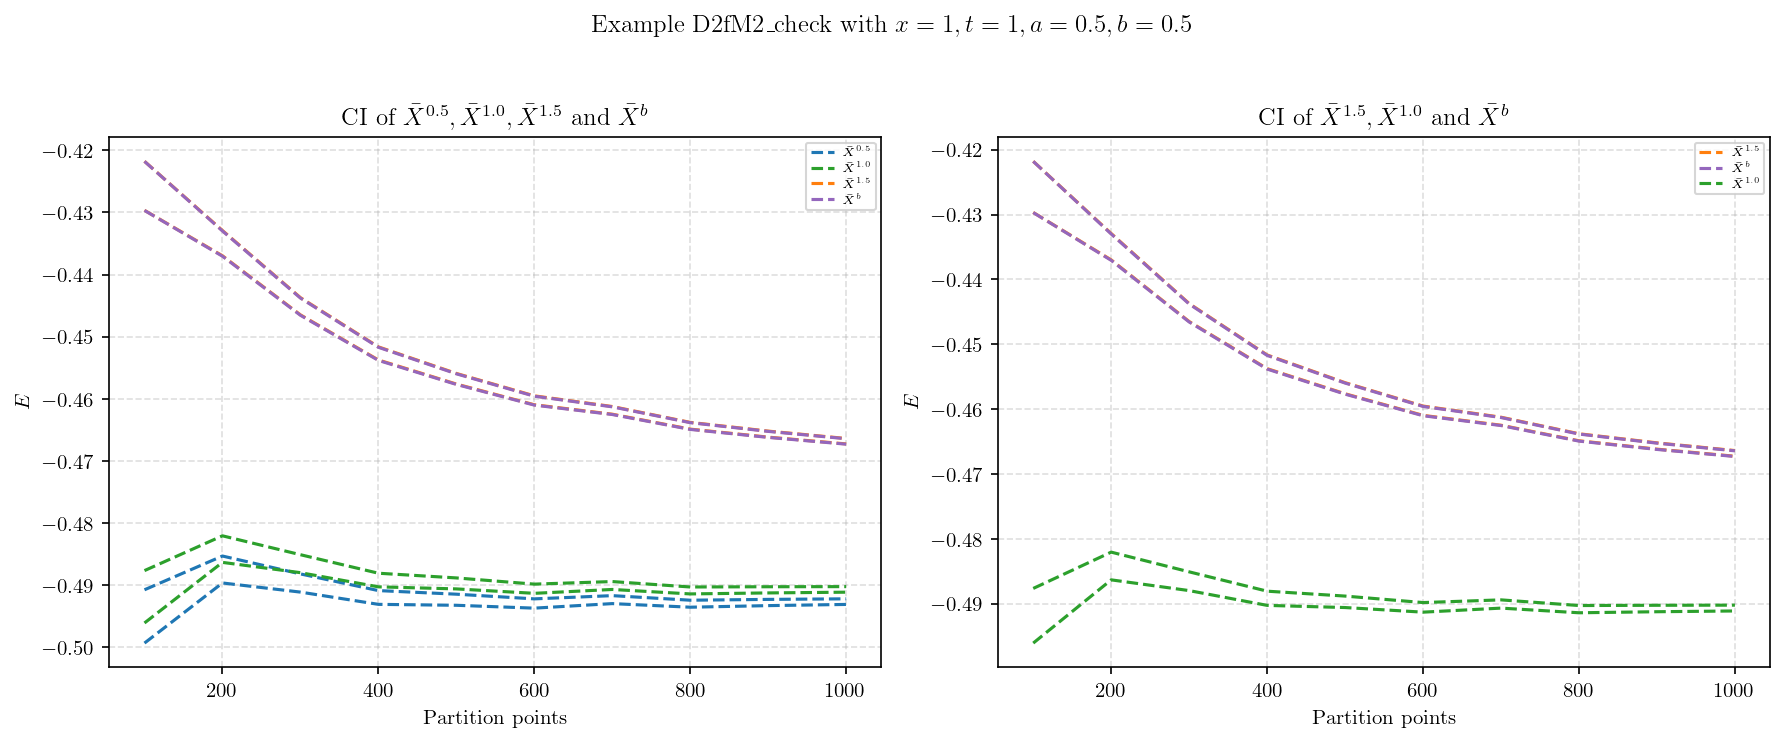

image saved to: sim_pics/D2fM2_check_100_1000_subplot.png


In [19]:
#D2fM2_check_100_1000
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")  # フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "D2fM2_check_100_1000_subplot.png"  # 画像保存パス（ファイル名だけ変更）

# 信頼水準(confidence level)の関数
def conf_level(a):  # aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a
    z = norm.ppf(1 - alpha / 2)
    return z

df2 = pd.read_csv("../data_source/D2fM2_check_100_1000_data.csv")

# z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a = 0.95
z = conf_level(a)

A_std_df2   = np.sqrt(df2['E'])      # Aの標本標準偏差(SD)
Am_std_df2  = np.sqrt(df2['Em'])     # Amの標本標準偏差(SD)
A15_std_df2 = np.sqrt(df2['E_1_5'])  # A_1_5の標本標準偏差(SD)
Axb_std_df2 = np.sqrt(df2['Eb'])     # A_bの標本標準偏差(SD)

paths = 10 * (df2['points'] ** 2)

# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)
Axb_se_df2   = Axb_std_df2 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']      + z * A_se_df2
A_low_df2    = df2['A']      - z * A_se_df2
Am_up_df2    = df2['Am']     + z * Am_se_df2
Am_low_df2   = df2['Am']     - z * Am_se_df2
A15_up_df2   = df2['A_1_5']  + z * A15_se_df2
A15_low_df2  = df2['A_1_5']  - z * A15_se_df2
Axb_up_df2   = df2['Ab']     + z * Axb_se_df2
Axb_low_df2  = df2['Ab']     - z * Axb_se_df2

# ---------- ここから subplot で 2 枚の図を描画 ----------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

# ===== 左側の図：元の3種類の信頼区間 =====
ax1 = axes[0]
ax1.plot(df2["points"], A_up_df2,  linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax1.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4")
ax1.plot(df2["points"], Am_up_df2,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax1.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c")
ax1.plot(df2["points"], A15_up_df2,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax1.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e")
ax1.plot(df2["points"], Axb_up_df2,  linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$")
ax1.plot(df2["points"], Axb_low_df2, linestyle="--", color="#9467bd")

ax1.set_title(r'CI of $\bar{X}^{0.5}, \bar{X}^{1.0}, \bar{X}^{1.5}$ and $\bar{X}^{b}$')
ax1.set_xlabel("Partition points")
ax1.set_ylabel("$E$")
ax1.grid(True, linestyle="--", alpha=0.4)
ax1.legend(fontsize=5.5, loc='best')

# ===== 右側の図：指定された4本の線の図 =====
ax2 = axes[1]
ax2.plot(df2["points"], A15_up_df2,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax2.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e")
ax2.plot(df2["points"], Axb_up_df2,  linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$")
ax2.plot(df2["points"], Axb_low_df2, linestyle="--", color="#9467bd")
ax2.plot(df2["points"], Am_up_df2,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax2.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c")

ax2.set_title(r'CI of $\bar{X}^{1.5},\bar{X}^{1.0}$ and $\bar{X}^{b}$')
ax2.set_xlabel("Partition points")
ax2.set_ylabel("$E$")
ax2.grid(True, linestyle="--", alpha=0.4)
ax2.legend(fontsize=5.5, loc='best')

# 全体タイトル（必要なら）
fig.suptitle(r'Example D2fM2_check with $x=1,t=1,a=0.5,b=0.5$')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 上に suptitle を置くために rect を少し縮める
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

### D2fM2_check_log

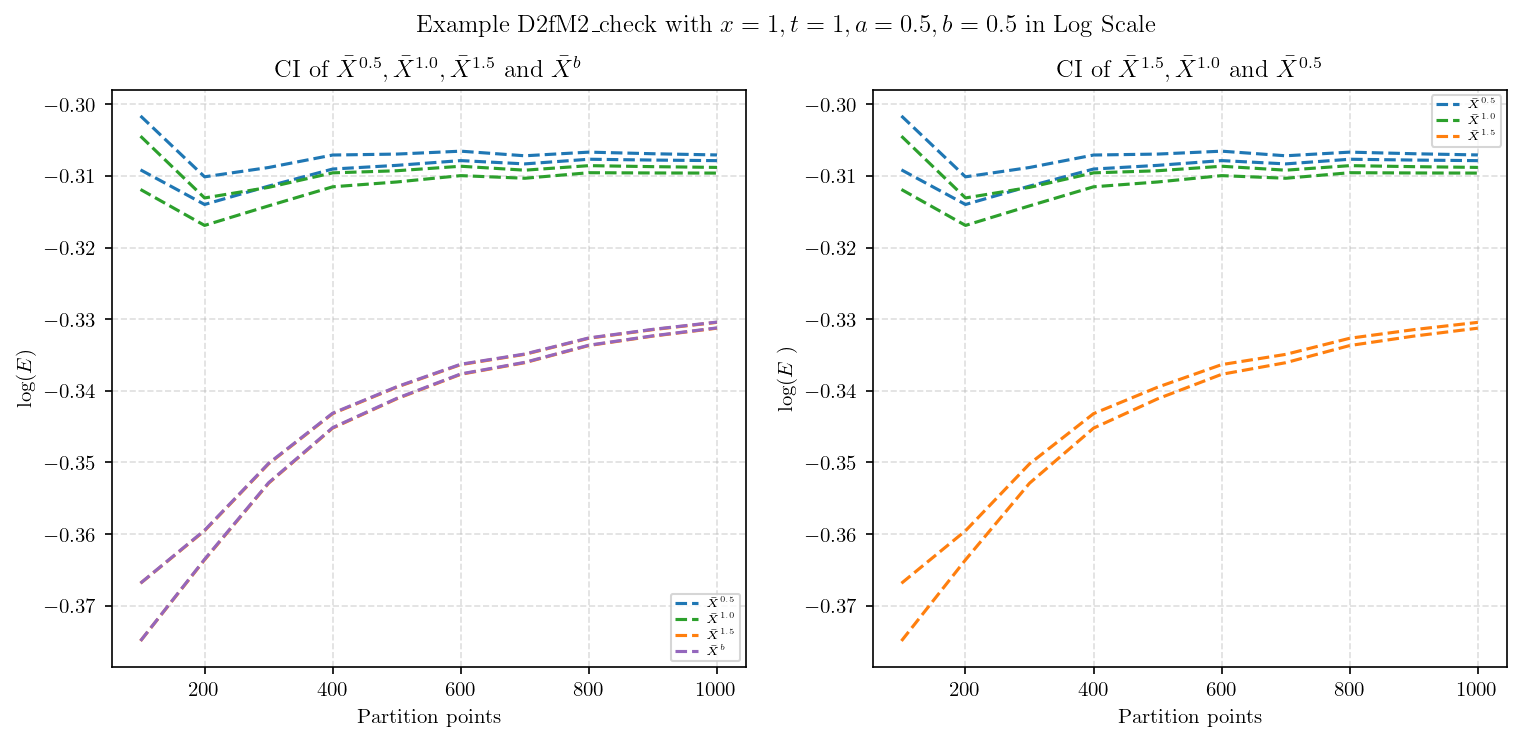

image saved to: sim_pics/D2fM2_check_log_100_1000.png


In [18]:
#D2fM2_check plot in Log scale
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")  # フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "D2fM2_check_log_100_1000.png"  # 画像保存パス（ファイル名だけ変更）

# 信頼水準(confidence level)の関数
def conf_level(a):  # aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a
    z = norm.ppf(1 - alpha / 2)
    return z

df2 = pd.read_csv("../data_source/D2fM2_check_100_1000_data.csv")

# z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a = 0.95
z = conf_level(a)

A_std_df2   = np.sqrt(df2['E'])      # Aの標本標準偏差(SD)
Am_std_df2  = np.sqrt(df2['Em'])     # Amの標本標準偏差(SD)
A15_std_df2 = np.sqrt(df2['E_1_5'])  # A_1_5の標本標準偏差(SD)
std_lim = np.sqrt(df2['Eb'])     # A_bの標本標準偏差(SD)


paths = 10 * (df2['points'] ** 2)

# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)
se_lim   = std_lim / np.sqrt(paths)


# Confidence bands
A_up_df2     = df2['A']      + z * A_se_df2
A_low_df2    = df2['A']      - z * A_se_df2
Am_up_df2    = df2['Am']     + z * Am_se_df2
Am_low_df2   = df2['Am']     - z * Am_se_df2
A15_up_df2   = df2['A_1_5']  + z * A15_se_df2
A15_low_df2  = df2['A_1_5']  - z * A15_se_df2
lim_up_df3   = df2['Ab']     + z * se_lim
lim_low_df3  = df2['Ab']     - z * se_lim


#Confidence bands in Log scale
A_up_df2_log     = np.log10(abs(A_up_df2))
A_low_df2_log    = np.log10(abs(A_low_df2))
Am_up_df2_log    = np.log10(abs(Am_up_df2))
Am_low_df2_log   = np.log10(abs(Am_low_df2))
A15_up_df2_log   = np.log10(abs(A15_up_df2))
A15_low_df2_log  = np.log10(abs(A15_low_df2))
lim_up_df3_log   = np.log10(abs(lim_up_df3))
lim_low_df3_log  = np.log10(abs(lim_low_df3))
    


# ---------- ここから subplot で 2 枚の図を描画 ----------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

# ===== 左側の図：元の3種類の信頼区間 =====
ax1 = axes[0]
ax1.plot(df2["points"], A_up_df2_log,  linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax1.plot(df2["points"], A_low_df2_log, linestyle="--", color="#1f77b4")
ax1.plot(df2["points"], Am_up_df2_log,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax1.plot(df2["points"], Am_low_df2_log, linestyle="--", color="#2ca02c")
ax1.plot(df2["points"], A15_up_df2_log,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax1.plot(df2["points"], A15_low_df2_log, linestyle="--", color="#ff7f0e")
ax1.plot(df2["points"], lim_up_df3_log,  linestyle="--", color="#9467bd", label=r"$\bar{X}^{b}$")
ax1.plot(df2["points"], lim_low_df3_log, linestyle="--", color="#9467bd")

ax1.set_title(r'CI of $\bar{X}^{0.5}, \bar{X}^{1.0}, \bar{X}^{1.5}$ and $\bar{X}^{b}$')
ax1.set_xlabel("Partition points")
ax1.set_ylabel(r"log($E$) ")
ax1.grid(True, linestyle="--", alpha=0.4)
ax1.legend(fontsize=5.5, loc='best')

# ===== 右側の図：指定された4本の線の図 =====
ax2 = axes[1]
ax2.plot(df2["points"], A_up_df2_log,  linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax2.plot(df2["points"], A_low_df2_log, linestyle="--", color="#1f77b4")
ax2.plot(df2["points"], Am_up_df2_log,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax2.plot(df2["points"], Am_low_df2_log, linestyle="--", color="#2ca02c")
ax2.plot(df2["points"], A15_up_df2_log,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax2.plot(df2["points"], A15_low_df2_log, linestyle="--", color="#ff7f0e")


ax2.set_title(r'CI of $\bar{X}^{1.5},\bar{X}^{1.0}$ and $\bar{X}^{0.5}$')
ax2.set_xlabel("Partition points")
ax2.set_ylabel(r"log($E$ )")
ax2.grid(True, linestyle="--", alpha=0.4)
ax2.legend(fontsize=5.5, loc='best')

# 全体タイトル（必要なら）
fig.suptitle(r'Example D2fM2_check with $x=1,t=1,a=0.5,b=0.5$ in Log Scale')
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

### D2fM2


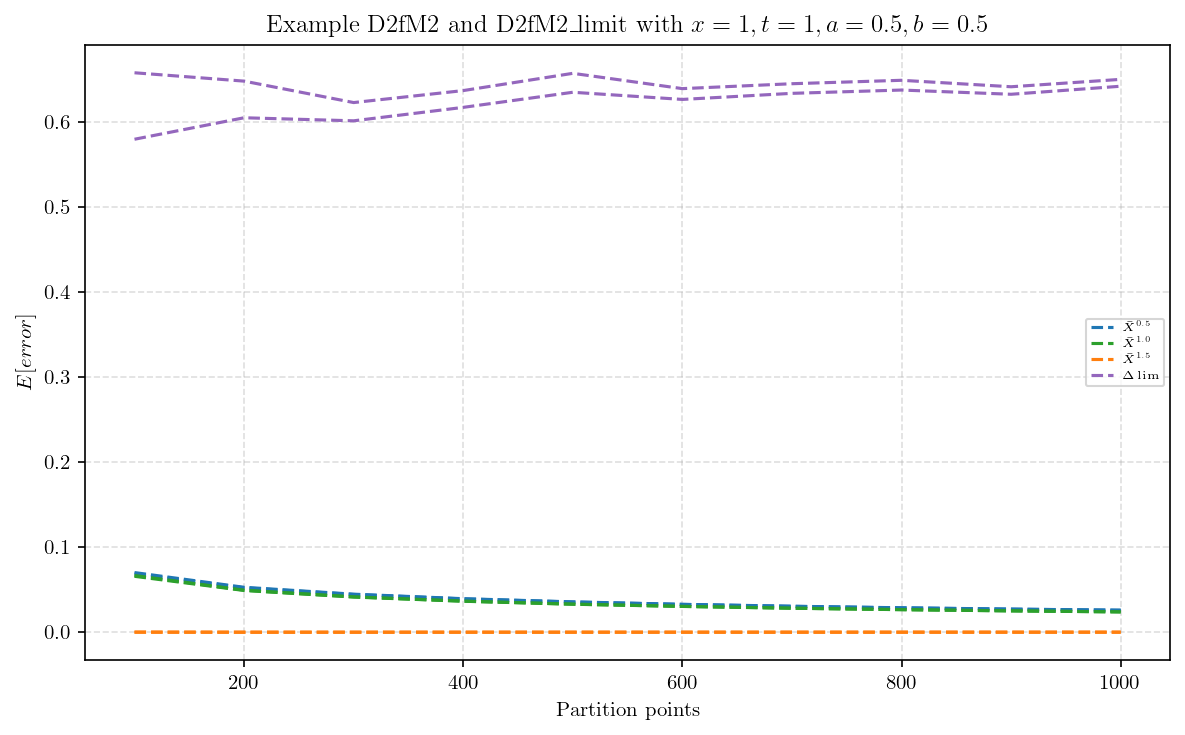

image saved to: sim_pics/D2fM2_and_limit_100_1000.png


In [17]:
#D2fM2_100_1000 plot with confidence intervals
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")# フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "D2fM2_and_limit_100_1000.png" #画像保存パス

#信頼水準(confidence level)の関数
def conf_level(a): #aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a #aが0.95なら、alpha=0.05となり（全体の5%が信頼区間外になる）,外側（両端）にある確率の合計である
    z=norm.ppf(1 - alpha / 2) #ここでPPF = Percaent Point Function,両側検定なのでalpha/2,norm.ppfは累積分布関数の逆関数、i.e.「何番目の値がこの累積確率になるのか？」を計算する
    return z

df2 = pd.read_csv("../data_source/D2fM2_100_1000_data.csv")
df3 = pd.read_csv("../data_source/D2fM2_100_1000_data.csv")


#z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a=0.95 #ここで信頼度を設定する
z=conf_level(a)
A_std_df2=np.sqrt(df2['E']) #Aの標本標準偏差(SD)
Am_std_df2=np.sqrt(df2['Em']) #Amの標本標準偏差(SD)
A15_std_df2=np.sqrt(df2['E_1_5']) #A_1_5の標本標準偏差(SD)
Axb_std_df3 = np.sqrt(df3['Eb']) #A_bの標本標準偏差(SD)

paths = 10 * (df2['points'] ** 2)
# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)
Axb_se_df3   = Axb_std_df3 / np.sqrt(paths)

# Confidence bands
A_up_df2     = df2['A']     + z * A_se_df2
A_low_df2    = df2['A']     - z * A_se_df2
Am_up_df2    = df2['Am']    + z * Am_se_df2
Am_low_df2   = df2['Am']    - z * Am_se_df2
A15_up_df2   = df2['A_1_5'] + z * A15_se_df2
A15_low_df2  = df2['A_1_5'] - z * A15_se_df2
Axb_up_df3   = df3['Ab'] + z * Axb_se_df3
Axb_low_df3  = df3['Ab'] - z * Axb_se_df3


# グラフを描画
plt.figure(figsize=(8, 5), dpi=150)  # dpi とは Dots Per Inch を意味する
plt.plot(df2["points"], A_up_df2, linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
plt.plot(df2["points"], A_low_df2, linestyle="--", color="#1f77b4")  
plt.plot(df2["points"], Am_up_df2, linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$ ")
plt.plot(df2["points"], Am_low_df2, linestyle="--", color="#2ca02c")  
plt.plot(df2["points"], A15_up_df2, linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$ ")
plt.plot(df2["points"], A15_low_df2, linestyle="--", color="#ff7f0e")
plt.plot(df3["points"], Axb_up_df3, linestyle="--", color="#9467bd", label=r"$\Delta\lim$ ")
plt.plot(df3["points"], Axb_low_df3, linestyle="--", color="#9467bd")


plt.title(r'Example D2fM2 and D2fM2_limit with $x=1,t=1,a=0.5,b=0.5$')
plt.xlabel("Partition points")
plt.ylabel("$E[error]$ ")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=5.5, loc='best')
plt.tight_layout()  # 自動的にレイアウトを調整する
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)

### D2fM2_log

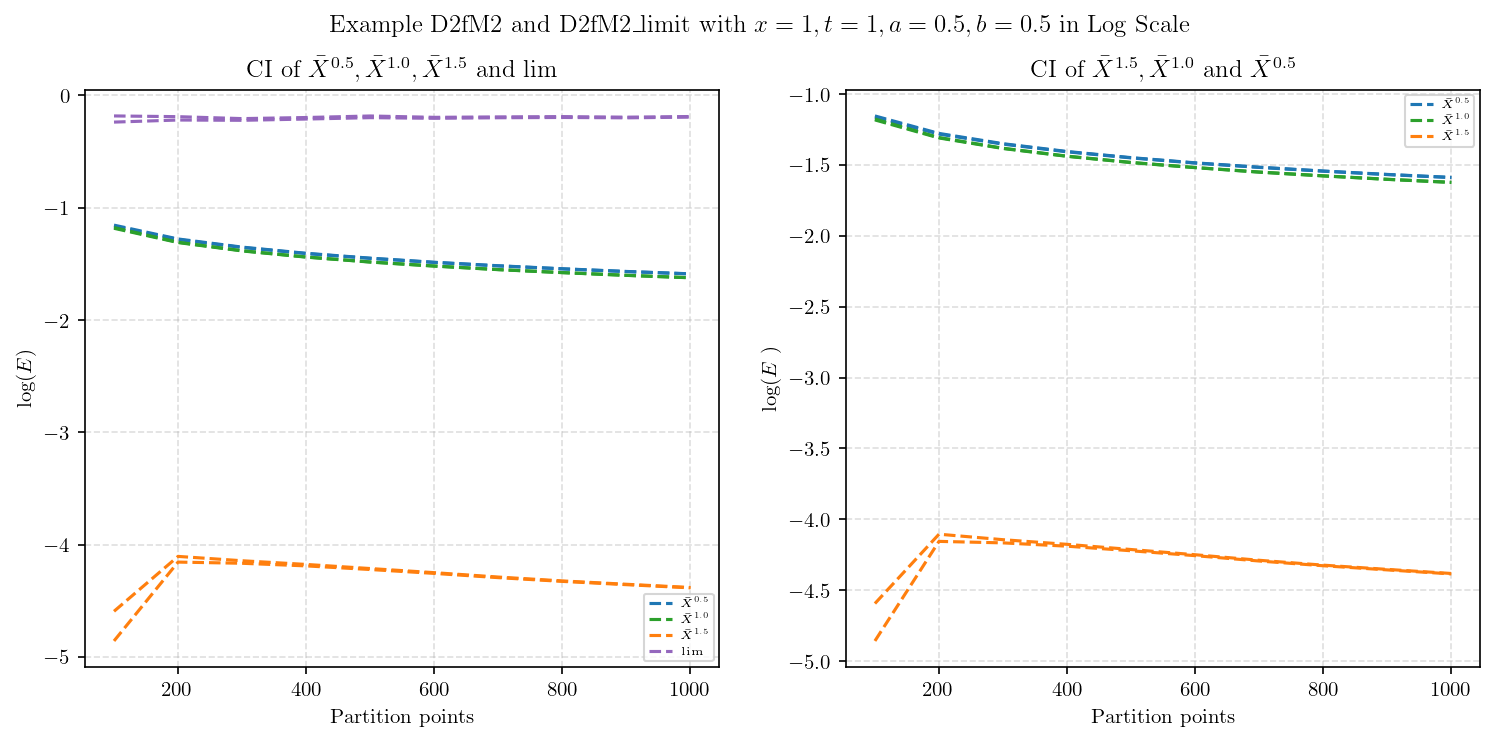

image saved to: sim_pics/D2fM2_and_lim_100_1000_subplot.png


In [16]:
#D2fM2_and_D2fM2_limit_100_1000 plot in Log scale
#信頼区間公式 \bar{X} ± z * (s/√n) 
# ここで、\bar{X}は標本平均、zは信頼水準、sは標本標準偏差(SD)、nはサンプルサイズ(SS),(s/√n)は標準誤差(SE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pathlib import Path
plt.rcParams['font.family'] = 'Hiragino Sans'  # 図のフォント設定
save_dir = Path("sim_pics")  # フォルダー保存先
save_dir.mkdir(exist_ok=True)

save_path = save_dir / "D2fM2_and_lim_100_1000_subplot.png"  # 画像保存パス（ファイル名だけ変更）

# 信頼水準(confidence level)の関数
def conf_level(a):  # aは信頼度であり、ex:a=0.95なら95%信頼区間
    alpha = 1-a
    z = norm.ppf(1 - alpha / 2)
    return z

df2 = pd.read_csv("../data_source/D2fM2_100_1000_data.csv")
df3 = pd.read_csv("../data_source/D2fM2_100_1000_data.csv")

# z信頼水準の計算,aは信頼度であり、ex:a=0.95なら95%信頼区間
a = 0.95
z = conf_level(a)

A_std_df2   = np.sqrt(df2['E'])      # Aの標本標準偏差(SD)
Am_std_df2  = np.sqrt(df2['Em'])     # Amの標本標準偏差(SD)
A15_std_df2 = np.sqrt(df2['E_1_5'])  # A_1_5の標本標準偏差(SD)
std_lim = np.sqrt(df3['Eb'])     # A_bの標本標準偏差(SD)


paths = 10 * (df2['points'] ** 2)

# Standard errors of sample means
A_se_df2     = A_std_df2   / np.sqrt(paths)
Am_se_df2    = Am_std_df2  / np.sqrt(paths)
A15_se_df2   = A15_std_df2 / np.sqrt(paths)
se_lim   = std_lim / np.sqrt(paths)


# Confidence bands
A_up_df2     = df2['A']      + z * A_se_df2
A_low_df2    = df2['A']      - z * A_se_df2
Am_up_df2    = df2['Am']     + z * Am_se_df2
Am_low_df2   = df2['Am']     - z * Am_se_df2
A15_up_df2   = df2['A_1_5']  + z * A15_se_df2
A15_low_df2  = df2['A_1_5']  - z * A15_se_df2
lim_up_df3   = df3['Ab']     + z * se_lim
lim_low_df3  = df3['Ab']     - z * se_lim


#Confidence bands in Log scale
A_up_df2_log     = np.log10(abs(A_up_df2))
A_low_df2_log    = np.log10(abs(A_low_df2))
Am_up_df2_log    = np.log10(abs(Am_up_df2))
Am_low_df2_log   = np.log10(abs(Am_low_df2))
A15_up_df2_log   = np.log10(abs(A15_up_df2))
A15_low_df2_log  = np.log10(abs(A15_low_df2))
lim_up_df3_log   = np.log10(abs(lim_up_df3))
lim_low_df3_log  = np.log10(abs(lim_low_df3))
    


# ---------- ここから subplot で 2 枚の図を描画 ----------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

# ===== 左側の図：元の3種類の信頼区間 =====
ax1 = axes[0]
ax1.plot(df2["points"], A_up_df2_log,  linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax1.plot(df2["points"], A_low_df2_log, linestyle="--", color="#1f77b4")
ax1.plot(df2["points"], Am_up_df2_log,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax1.plot(df2["points"], Am_low_df2_log, linestyle="--", color="#2ca02c")
ax1.plot(df2["points"], A15_up_df2_log,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax1.plot(df2["points"], A15_low_df2_log, linestyle="--", color="#ff7f0e")
ax1.plot(df3["points"], lim_up_df3_log,  linestyle="--", color="#9467bd", label=r"$\lim$")
ax1.plot(df3["points"], lim_low_df3_log, linestyle="--", color="#9467bd")

ax1.set_title(r'CI of $\bar{X}^{0.5}, \bar{X}^{1.0}, \bar{X}^{1.5}$ and $\lim$')
ax1.set_xlabel("Partition points")
ax1.set_ylabel(r"log($E$) ")
ax1.grid(True, linestyle="--", alpha=0.4)
ax1.legend(fontsize=5.5, loc='best')

# ===== 右側の図：指定された4本の線の図 =====
ax2 = axes[1]
ax2.plot(df2["points"], A_up_df2_log,  linestyle="--", color="#1f77b4", label=r"$\bar{X}^{0.5}$")
ax2.plot(df2["points"], A_low_df2_log, linestyle="--", color="#1f77b4")
ax2.plot(df2["points"], Am_up_df2_log,  linestyle="--", color="#2ca02c", label=r"$\bar{X}^{1.0}$")
ax2.plot(df2["points"], Am_low_df2_log, linestyle="--", color="#2ca02c")
ax2.plot(df2["points"], A15_up_df2_log,  linestyle="--", color="#ff7f0e", label=r"$\bar{X}^{1.5}$")
ax2.plot(df2["points"], A15_low_df2_log, linestyle="--", color="#ff7f0e")


ax2.set_title(r'CI of $\bar{X}^{1.5},\bar{X}^{1.0}$ and $\bar{X}^{0.5}$')
ax2.set_xlabel("Partition points")
ax2.set_ylabel(r"log($E$ )")
ax2.grid(True, linestyle="--", alpha=0.4)
ax2.legend(fontsize=5.5, loc='best')

# 全体タイトル（必要なら）
fig.suptitle(r'Example D2fM2 and D2fM2_limit with $x=1,t=1,a=0.5,b=0.5$ in Log Scale')
plt.savefig(save_path, dpi=250, bbox_inches='tight')
plt.show()
print("image saved to:", save_path)